# Predicting Fraudulent Transactions


## Data Dictionary 

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [7]:
# Generating full report and analysis using Pandas-Profiling Library
profile = pp.ProfileReport(df,title="Analysis Report",explorative=True)

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Deeshu\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\Deeshu\anaconda3\lib\site-packages\scipy\stats\stats.py:4814: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Doing Manually Also

## Checking for Missing Values

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# There are no missing values

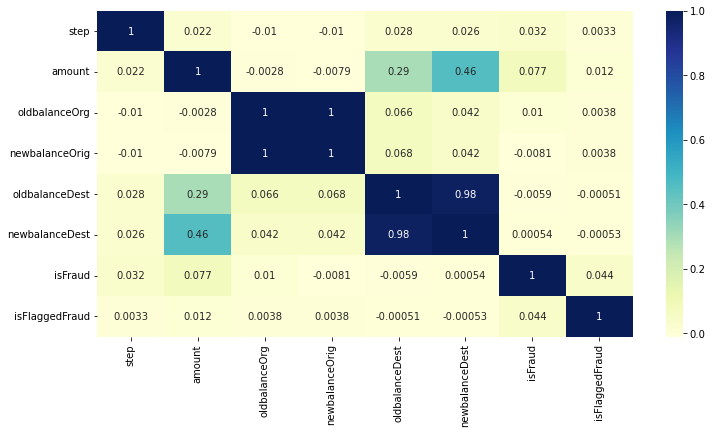

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True);

In [13]:
df.corr()["isFraud"].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

In [14]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
# We can see type, nameOrig, nameDest are of Object Datatypes
# Dealing with the categorical data

## type

In [16]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

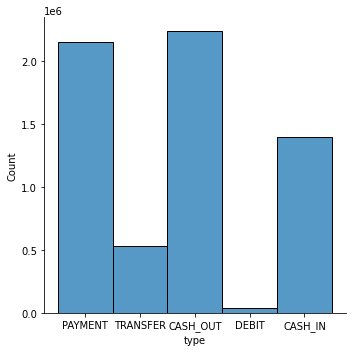

In [17]:
sns.displot(x="type",data=df)

In [18]:
df_type = pd.get_dummies(df['type'], prefix='type', drop_first=True)
df.drop('type',axis=1,inplace=True)
df = pd.concat([df,df_type],axis=1)

In [19]:
df.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0             0.0             0.0        0               0              0   
1             0.0             0.0        0               0              0   
2             0.0             0.0        1               0              0   
3         21182.0             0.0        1               0              1   
4             0.0             0.0        0               0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0             1              0  
1           0             1              0  
2           0             0              1  
3           0             0              0  
4           0             1              0

## nameOrig & nameDest

In [20]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [21]:
df['nameOrig'].nunique()

6353307

In [22]:
df['nameDest'].nunique()

2722362

In [23]:
# Too much uniquevalues for these columns

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [25]:
df['nameOrig'] = label.fit_transform(df['nameOrig'])
df['nameDest'] = label.fit_transform(df['nameDest'])

In [26]:
df.head()

step    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1   9839.64    757869       170136.0       160296.36   1662094   
1     1   1864.28   2188998        21249.0        19384.72   1733924   
2     1    181.00   1002156          181.0            0.00    439685   
3     1    181.00   5828262          181.0            0.00    391696   
4     1  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0             0.0             0.0        0               0              0   
1             0.0             0.0        0               0              0   
2             0.0             0.0        1               0              0   
3         21182.0             0.0        1               0              1   
4             0.0             0.0        0               0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0             1              0  
1           0             1              0  
2           0             0              1  
3           0             0              0  
4           0             1              0

## Outliers

In [27]:
# Distribution and Boxplot for Outlier Detection
def outlier_viz(col):
    sns.boxplot(x=col)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    plt.show()

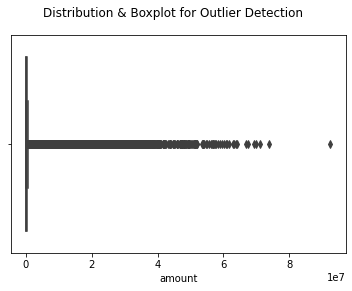

In [28]:
outlier_viz(df['amount'])

In [29]:
df['amount'].describe().T

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [30]:
# Setting a threshold for outlier
thresh = df['amount'].max()*0.9
thresh

83200964.976

In [31]:
len(df)

6362620

In [32]:
# Dropping those outiers
df = df[df['amount']<=thresh]

In [33]:
# New length after dropping those outliers
len(df)

6362619

## Multi-Collinearity Checking

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
  
print(vif_data)

           feature         VIF
0             step    3.238715
1           amount    4.305193
2         nameOrig    3.266044
3    oldbalanceOrg  622.180026
4   newbalanceOrig  632.220822
5         nameDest    7.294148
6   oldbalanceDest   73.896630
7   newbalanceDest   85.755944
8          isFraud    1.207132
9   isFlaggedFraud    1.002625
10   type_CASH_OUT    2.487062
11      type_DEBIT    1.026914
12    type_PAYMENT    7.493812
13   type_TRANSFER    1.537651


In [35]:
# Here oldbalanceorg and newbalanceorig has high vif so these are creating multi-collinearity
# And, oldbalanceDest and newbalanceDest also has multi-collinearity.

In [36]:
## Removing Multi-Collinearity
# We will remove these columns as they have multi-collinearity and and add the difference of these columns in the data set.

In [37]:
bal_change=[]
for i in range(len(df["newbalanceOrig"])):
    diff=df["newbalanceOrig"].iloc[i]-df["oldbalanceOrg"].iloc[i]
    if diff>0:
        bal_change.append(0)
    else:
        bal_change.append(1)

In [38]:
dest_bal_change=[]
dest_bal=[]
for i in list(range(len(df))):
    diff=df["newbalanceDest"].iloc[i]-df["oldbalanceDest"].iloc[i]
    if diff>0:
        dest_bal_change.append(0)
        dest_bal.append(abs(diff))
    else:
        dest_bal_change.append(1)
        dest_bal.append(abs(diff))

In [39]:
df["source_bal_change"]=bal_change
df["destination"]=dest_bal
df["dest_bal_chnage"]=dest_bal_change

In [40]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [41]:
df.head()

step    amount  nameOrig  nameDest  isFraud  isFlaggedFraud  type_CASH_OUT  \
0     1   9839.64    757869   1662094        0               0              0   
1     1   1864.28   2188998   1733924        0               0              0   
2     1    181.00   1002156    439685        1               0              0   
3     1    181.00   5828262    391696        1               0              1   
4     1  11668.14   3445981    828919        0               0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  source_bal_change  destination  \
0           0             1              0                  1          0.0   
1           0             1              0                  1          0.0   
2           0             0              1                  1          0.0   
3           0             0              0                  1      21182.0   
4           0             1              0                  1          0.0   

   dest_bal_chnage  
0                1  
1                1  
2                1  
3                1  
4                1

# Checking if Data is Imbalanced or Not

In [42]:
df['isFraud'].value_counts()

0    6354406
1       8213
Name: isFraud, dtype: int64

In [43]:
x=df.drop("isFraud",axis=1)
y=df['isFraud']

In [44]:
## Data is Imbalanced
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 6354406, 1: 8213})


In [45]:
ros = RandomOverSampler()
X, Y = ros.fit_resample(x,y)
print(Counter(Y))

Counter({0: 6354406, 1: 6354406})


In [46]:
# The data is balanced now..

## Normalizing the Data

In [47]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Splitting the Dataset

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

## Importing the Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier(n_estimators=10)

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
pred = rfc.predict(x_test)

## Evaluation

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1905868
           1       1.00      1.00      1.00   1906776

    accuracy                           1.00   3812644
   macro avg       1.00      1.00      1.00   3812644
weighted avg       1.00      1.00      1.00   3812644



In [55]:
print(confusion_matrix(y_test,pred))

[[1905758     110]
 [      0 1906776]]


In [56]:
# It is possible that we are overfitting our model

In [57]:
rf = RandomForestClassifier(n_estimators=1)
for iter in range(10):
    rf.fit(x_train, y_train)
    y_train_predicted = rf.predict(x_train)
    y_test_predicted = rf.predict(x_test)
    acc_train = accuracy_score(y_train, y_train_predicted)
    acc_test = accuracy_score(y_test, y_test_predicted)
    print("Iteration: {} Train Acc: {} Test Acc: {}".format(iter, acc_train, acc_test))
    rf.n_estimators += 1

Iteration: 0 Train Acc: 0.9989161625544841 Test Acc: 0.9987323757476438
Iteration: 1 Train Acc: 0.9999929182992048 Test Acc: 0.9999580343719476
Iteration: 2 Train Acc: 0.9999834760314779 Test Acc: 0.9999210521622265
Iteration: 3 Train Acc: 0.9999973022092209 Test Acc: 0.9999737714824672
Iteration: 4 Train Acc: 0.9999929182992048 Test Acc: 0.9999514772425645
Iteration: 5 Train Acc: 0.9999975270251191 Test Acc: 0.999968788064136
Iteration: 6 Train Acc: 0.9999959533138313 Test Acc: 0.999960657223701
Iteration: 7 Train Acc: 0.9999978642489665 Test Acc: 0.9999756074786946
Iteration: 8 Train Acc: 0.9999977518410174 Test Acc: 0.9999624932199283
Iteration: 9 Train Acc: 0.9999985386966613 Test Acc: 0.9999724600565907


In [58]:
# No overfitting present.
# We have excellent results..

## Analyze which were the Most Relevant Characteristics for the Prediction of our Model

Text(0.5, 1.0, 'Most Relevant Characteristics for the Prediction of our Model')

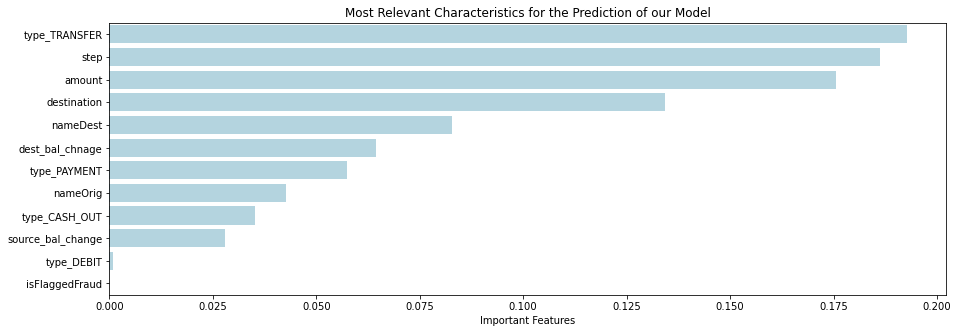

In [63]:
# Displaying Importance Chart
feature_importances = pd.DataFrame(rfc.feature_importances_, x.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances = feature_importances.rename(columns={0: 'Important Features'})

#Plotar grafico
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importances['Important Features'], y=feature_importances.index, color='lightblue')
plt.title('Most Relevant Characteristics for the Prediction of our Model')

### We can observe the that the most important characterstics are:
1. Type of the Transaction
2. Step (If some more info would have been provided, it would have been better to get more understanding)
3. Amount of the Transaction
4. Destination i.e Difference in balance receipt after and before transaction

### Fraud Detection Model
In a fraud detection model, precision metric is highly important because rather than predicting normal transactions correctly we would want to predict the Fraudulent transactions correctly and the Legit ones to be let off.
If any fraudulent transactions gets let off we wont be able to catch culprit.


### Key factors that predict fraudulent customer
1. Payment Methods
2. Name of customer who is the recipient of the transaction
3. Transaction history.


### Prevention should be adopted while company update its infrastructure
1. Use smart verified apps only.
2. Browse through secured websites for data security.
3. Use secured internet connections.
4. Don't respond to unsolicited calls/SMS(s/E-mails.
5. If detect any fraudulent transaction, contact the bank immidiately.



### Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending E-statements.
2. Always keep a log of the payments.

# THANKYOU